# DBT District-wise Data Cleaning Process

This notebook documents the step-by-step process of cleaning and preparing the DBT (Direct Benefit Transfer) district-wise dataset. The cleaning process ensures data quality and consistency for further analysis.

## Data Cleaning Steps Overview:
1. Data Loading and Initial Inspection
2. Column Name Standardization
3. Missing Value Analysis and Treatment
4. Data Type Corrections
5. Duplicate Handling
6. Feature Engineering
7. Final Dataset Creation

## Data Loading and Initial Inspection

We begin by importing necessary libraries and loading the dataset. This step helps us understand:
- The structure of our data
- Available columns
- Basic information about data types
- Initial data quality issues

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('dbt-district-wise.csv')

# Display the first few rows and basic information
print("\nDataset Info:")
print(df.info())
print("Dataset Description:")
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3825 non-null   int64  
 1   fy                      3825 non-null   object 
 2   state_name              3825 non-null   object 
 3   state_code              3825 non-null   int64  
 4   district_name           3825 non-null   object 
 5   district_code           3825 non-null   int64  
 6   total_dbt_transfer      3704 non-null   float64
 7   no_of_dbt_transactions  3704 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 239.2+ KB
None
Dataset Description:


,id,fy,state_name,state_code,district_name,district_code,total_dbt_transfer,no_of_dbt_transactions
0,0,2019-2020,Jammu And Kashmir,1,Anantnag,1,203800000.0,720115.0
1,1,2019-2020,Jammu And Kashmir,1,Budgam,2,54600000.0,204443.0
2,2,2019-2020,Jammu And Kashmir,1,Baramulla,3,246800000.0,911993.0
3,3,2019-2020,Jammu And Kashmir,1,Doda,4,53800000.0,243799.0
4,4,2019-2020,Jammu And Kashmir,1,Jammu,5,442000000.0,2277901.0


## Column Name Standardization

Standardizing column names by:
- Converting to lowercase
- Replacing spaces with underscores
This ensures consistency and makes the columns easier to reference in code.

In [9]:
# Clean column names: convert to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display the new column names
print("Updated column names:")
print(df.columns.tolist())

Updated column names:
['id', 'fy', 'state_name', 'state_code', 'district_name', 'district_code', 'total_dbt_transfer', 'no_of_dbt_transactions']


## Missing Values Analysis

Check for missing values in the dataset to:
- Identify columns with missing data
- Understand the extent of missing values
- Plan appropriate handling strategies

In [10]:
# Check for missing values
print("Missing values count in each column:")
print(df.isnull().sum())


Missing values count in each column:
id                        0
fy                        0
state_name                0
state_code                0
district_name             0
district_code             0
total_dbt_transfer        0
no_of_dbt_transactions    0
dtype: int64


### Missing Values Treatment

Handle missing values using district-wise median imputation:
- For each district, calculate the median value
- Fill missing values with the corresponding district's median
- This approach maintains the district-level patterns in the data

In [11]:
# Handle missing values by filling with median values grouped by district
for column in ['total_dbt_transfer', 'no_of_dbt_transactions']:
    df[column] = df.groupby('district_name')[column].transform(lambda x: x.fillna(x.median()))

# Check if there are any remaining missing values
print("Remaining missing values after handling:")
print(df.isnull().sum())

Remaining missing values after handling:
id                        0
fy                        0
state_name                0
state_code                0
district_name             0
district_code             0
total_dbt_transfer        0
no_of_dbt_transactions    0
dtype: int64


## Data Type Corrections

### Monetary Value Cleaning
Clean the monetary values in the dataset by:
- Removing currency symbols (₹)
- Removing commas from numbers
- Converting to proper numerical format for analysis

In [12]:
# Convert monetary column (remove ₹ and commas if present)
def clean_monetary_value(x):
    if isinstance(x, str):
        return float(str(x).replace('₹', '').replace(',', ''))
    return x

# Clean total_dbt_transfer column
df['total_dbt_transfer'] = df['total_dbt_transfer'].apply(clean_monetary_value)

print("Sample of cleaned monetary values:")
print(df[['total_dbt_transfer']].head())

Sample of cleaned monetary values:
   total_dbt_transfer
0           203800000
1            54600000
2           246800000
3            53800000
4           442000000


### Transaction Count Data Type Conversion

Convert the number of transactions to proper integer format:
- Round any decimal values to nearest whole number
- Convert to 64-bit integer (int64) data type
- This ensures that transaction counts are always whole numbers
- Maintains data accuracy while optimizing memory usage

In [13]:
# Convert no_of_dbt_transactions to integer type (rounding any decimal values)
df['no_of_dbt_transactions'] = df['no_of_dbt_transactions'].round().astype('int64')
df['total_dbt_transfer'] = df['total_dbt_transfer'].round().astype('int64')

print("Updated datatypes after converting transactions to integer:")
print(df.dtypes)

# Show sample of the data to verify
print("\nSample data with updated types:")
print(df[['total_dbt_transfer', 'no_of_dbt_transactions']].head())

Updated datatypes after converting transactions to integer:
id                         int64
fy                        object
state_name                object
state_code                 int64
district_name             object
district_code              int64
total_dbt_transfer         int64
no_of_dbt_transactions     int64
dtype: object

Sample data with updated types:
   total_dbt_transfer  no_of_dbt_transactions
0           203800000                  720115
1            54600000                  204443
2           246800000                  911993
3            53800000                  243799
4           442000000                 2277901


In [15]:
df.drop(columns = ['district_code', 'state_code'], inplace=True)

## Duplicate Handling

Check and remove any duplicate entries in the dataset:
- Identify if any duplicate rows exist
- Remove duplicates if found
- Maintain data integrity while reducing redundancy

In [17]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows if any exist
df_clean = df.drop_duplicates()

# Print the shape before and after removing duplicates
print("\nDataset shape:")
print(f"Before removing duplicates: {df.shape}")
print(f"After removing duplicates: {df_clean.shape}")

# Reassign to original variable
df = df_clean

Number of duplicate rows: 0

Dataset shape:
Before removing duplicates: (3825, 6)
After removing duplicates: (3825, 6)


## Feature Engineering

### Time Period Splitting
Split the fiscal year into separate columns:
- Extract start and end years from fiscal year format
- Create new columns for better time-based analysis
- Convert to proper numerical format for temporal analysis

In [18]:
# Function to split fiscal year into start and end years
def split_fy(fy_str):
    # Extract years from strings like '2020-21'
    years = fy_str.split('-')
    if len(years) == 2:
        start_year = int('20' + years[0] if len(years[0]) == 2 else years[0])
        end_year = int('20' + years[1] if len(years[1]) == 2 else years[1])
        return pd.Series({'start_year': start_year, 'end_year': end_year})
    return pd.Series({'start_year': None, 'end_year': None})

# Split the fiscal year column
df[['start_year', 'end_year']] = df['fy'].apply(split_fy)

# Display sample of the data with new columns
print("Sample data with split fiscal years:")
print(df[['fy', 'start_year', 'end_year']].head())

# Verify datatypes of new columns
print("\nDatatypes of new columns:")
print(df[['start_year', 'end_year']].dtypes)

Sample data with split fiscal years:
          fy  start_year  end_year
0  2019-2020        2019      2020
1  2019-2020        2019      2020
2  2019-2020        2019      2020
3  2019-2020        2019      2020
4  2019-2020        2019      2020

Datatypes of new columns:
start_year    int64
end_year      int64
dtype: object


### Transfer per Transaction Analysis

Create and analyze a new efficiency metric:
1. Calculation Method:
   - Divide total DBT transfer by number of transactions
   - Shows average amount transferred per transaction
   - Helps identify variations in benefit distribution

2. Why this metric is important:
   - Reveals the typical benefit amount per transaction
   - Helps identify districts with unusually high/low transfer amounts
   - Useful for:
     * Comparing efficiency across districts
     * Identifying potential anomalies
     * Understanding benefit distribution patterns

3. Statistical Analysis:
   - View summary statistics (mean, median, std, etc.)
   - Understand the distribution of transfer amounts
   - Identify potential outliers in benefit distribution

In [19]:
# Calculate transfer per transaction
df['transfer_per_transaction'] = df['total_dbt_transfer'] / df['no_of_dbt_transactions']

# Display sample of the data with the new derived column
print("Sample data with transfer per transaction:")
print(df[['total_dbt_transfer', 'no_of_dbt_transactions', 'transfer_per_transaction']].head())

# Add some basic statistics about the new column
print("\nSummary statistics of transfer per transaction:")
print(df['transfer_per_transaction'].describe())

Sample data with transfer per transaction:
   total_dbt_transfer  no_of_dbt_transactions  transfer_per_transaction
0           203800000                  720115                283.010353
1            54600000                  204443                267.067104
2           246800000                  911993                270.616112
3            53800000                  243799                220.673588
4           442000000                 2277901                194.038283

Summary statistics of transfer per transaction:
count      3809.000000
mean       1573.361335
std        7849.642205
min           0.000000
25%         547.302027
50%        1042.931958
75%        1468.045631
max      220817.302439
Name: transfer_per_transaction, dtype: float64


In [20]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'clean_dbt_district_wise.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset has been saved to: {cleaned_file_path}")
print(f"Shape of saved dataset: {df.shape}")
print("\nColumns in the cleaned dataset:")
for col in df.columns:
    print(f"- {col}")

Cleaned dataset has been saved to: clean_dbt_district_wise.csv
Shape of saved dataset: (3825, 9)

Columns in the cleaned dataset:
- id
- fy
- state_name
- district_name
- total_dbt_transfer
- no_of_dbt_transactions
- start_year
- end_year
- transfer_per_transaction


In [21]:
# Load the cleaned dataset
df = pd.read_csv('clean_dbt_district_wise.csv')

# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nFirst few rows of the dataset:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

Dataset Shape: (3825, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3825 non-null   int64  
 1   fy                        3825 non-null   object 
 2   state_name                3825 non-null   object 
 3   district_name             3825 non-null   object 
 4   total_dbt_transfer        3825 non-null   int64  
 5   no_of_dbt_transactions    3825 non-null   int64  
 6   start_year                3825 non-null   int64  
 7   end_year                  3825 non-null   int64  
 8   transfer_per_transaction  3809 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 269.1+ KB
None

First few rows of the dataset:
   id         fy         state_name district_name  total_dbt_transfer  \
0   0  2019-2020  Jammu And Kashmir      Anantnag           203800000   
1 

In [22]:
# Get descriptive statistics for numerical columns
numeric_columns = ['total_dbt_transfer', 'no_of_dbt_transactions', 'transfer_per_transaction']

print("Descriptive Statistics for Numerical Columns:")
print(df[numeric_columns].describe())

# Additional statistics
print("\nSkewness:")
print(df[numeric_columns].skew())

Descriptive Statistics for Numerical Columns:
       total_dbt_transfer  no_of_dbt_transactions  transfer_per_transaction
count        3.825000e+03            3.825000e+03               3809.000000
mean         5.217052e+09            5.695334e+06               1573.361335
std          6.391206e+09            8.312446e+06               7849.642205
min         -3.320000e+07           -8.270500e+04                  0.000000
25%          4.660000e+08            7.112430e+05                547.302027
50%          2.314154e+09            2.631340e+06               1042.931958
75%          8.161550e+09            7.865994e+06               1468.045631
max          3.955478e+10            9.716942e+07             220817.302439

Skewness:
total_dbt_transfer           1.653234
no_of_dbt_transactions       4.158125
transfer_per_transaction    24.096190
dtype: float64


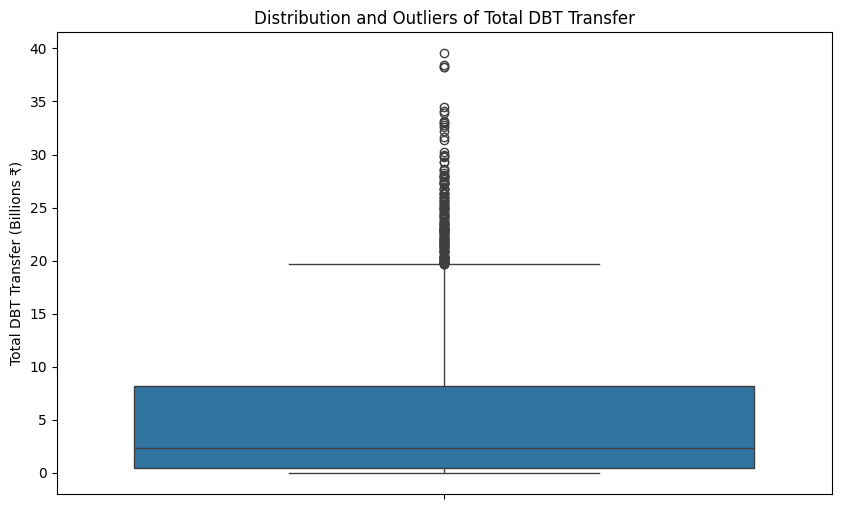

In [23]:
# 1.1 Boxplot Analysis of Total DBT Transfer

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['total_dbt_transfer']/1e9)
plt.title('Distribution and Outliers of Total DBT Transfer', fontsize=12)
plt.ylabel('Total DBT Transfer (Billions ₹)')
plt.show()

# Print outlier statistics for ML consideration
Q1 = df['total_dbt_transfer'].quantile(0.25)
Q3 = df['total_dbt_transfer'].quantile(0.75)
IQR = Q3 - Q1
outlier_count = len(df[(df['total_dbt_transfer'] < (Q1 - 1.5 * IQR)) | 
                      (df['total_dbt_transfer'] > (Q3 + 1.5 * IQR))])



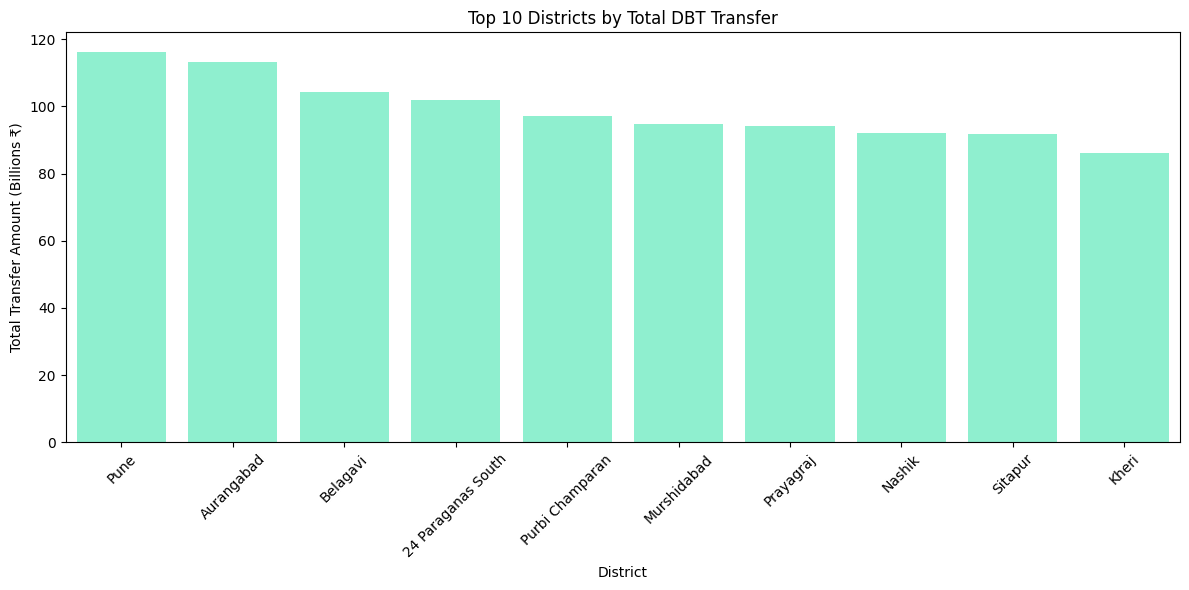

In [24]:
# 1.2 Top 10 Districts Analysis

plt.figure(figsize=(12, 6))
top_10_districts = df.groupby('district_name')['total_dbt_transfer'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_10_districts.index, y=top_10_districts.values/1e9 , color='aquamarine')
plt.title('Top 10 Districts by Total DBT Transfer', fontsize=12)
plt.xlabel('District')
plt.ylabel('Total Transfer Amount (Billions ₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

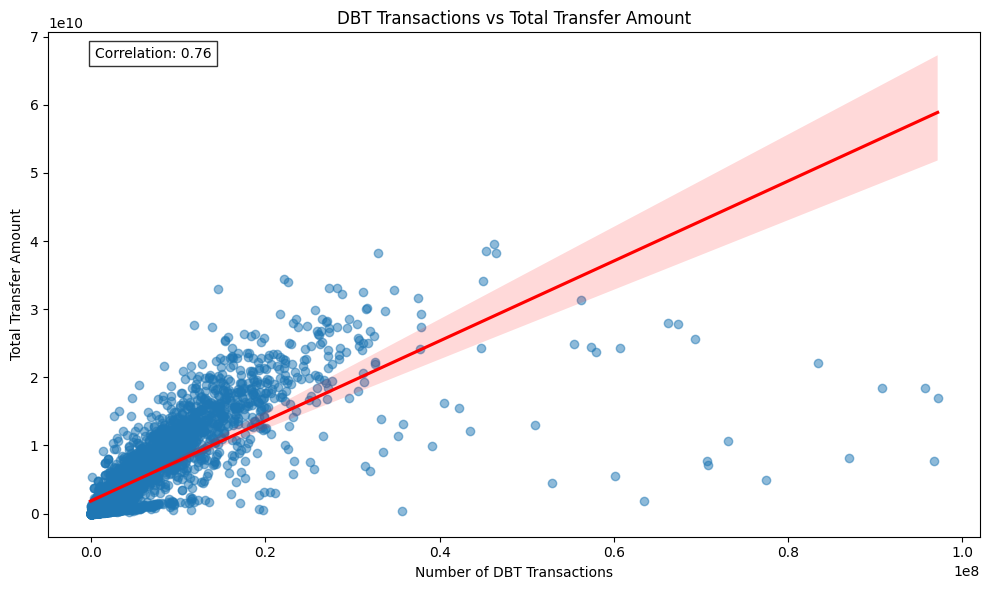

In [25]:
# 2.1 Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='no_of_dbt_transactions', y='total_dbt_transfer', data=df, 
           scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('DBT Transactions vs Total Transfer Amount', fontsize=12)
plt.xlabel('Number of DBT Transactions')
plt.ylabel('Total Transfer Amount')

# Calculate correlation coefficient
correlation = df['no_of_dbt_transactions'].corr(df['total_dbt_transfer'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


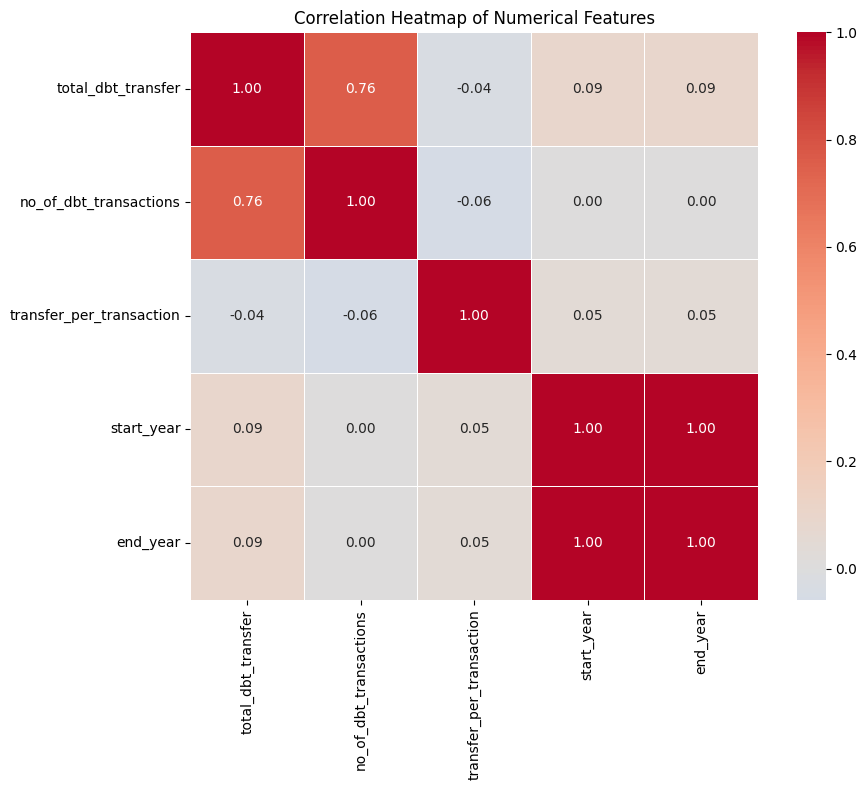

In [26]:
# 2.2 Correlation Heatmap
# Select numerical columns for correlation analysis
numeric_cols = ['total_dbt_transfer', 'no_of_dbt_transactions', 'transfer_per_transaction', 
                'start_year', 'end_year']
correlation_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=12)
plt.tight_layout()
plt.show()

## 3. Multivariate Analysis
Analyzing complex relationships and temporal patterns across multiple variables for advanced ML feature engineering.

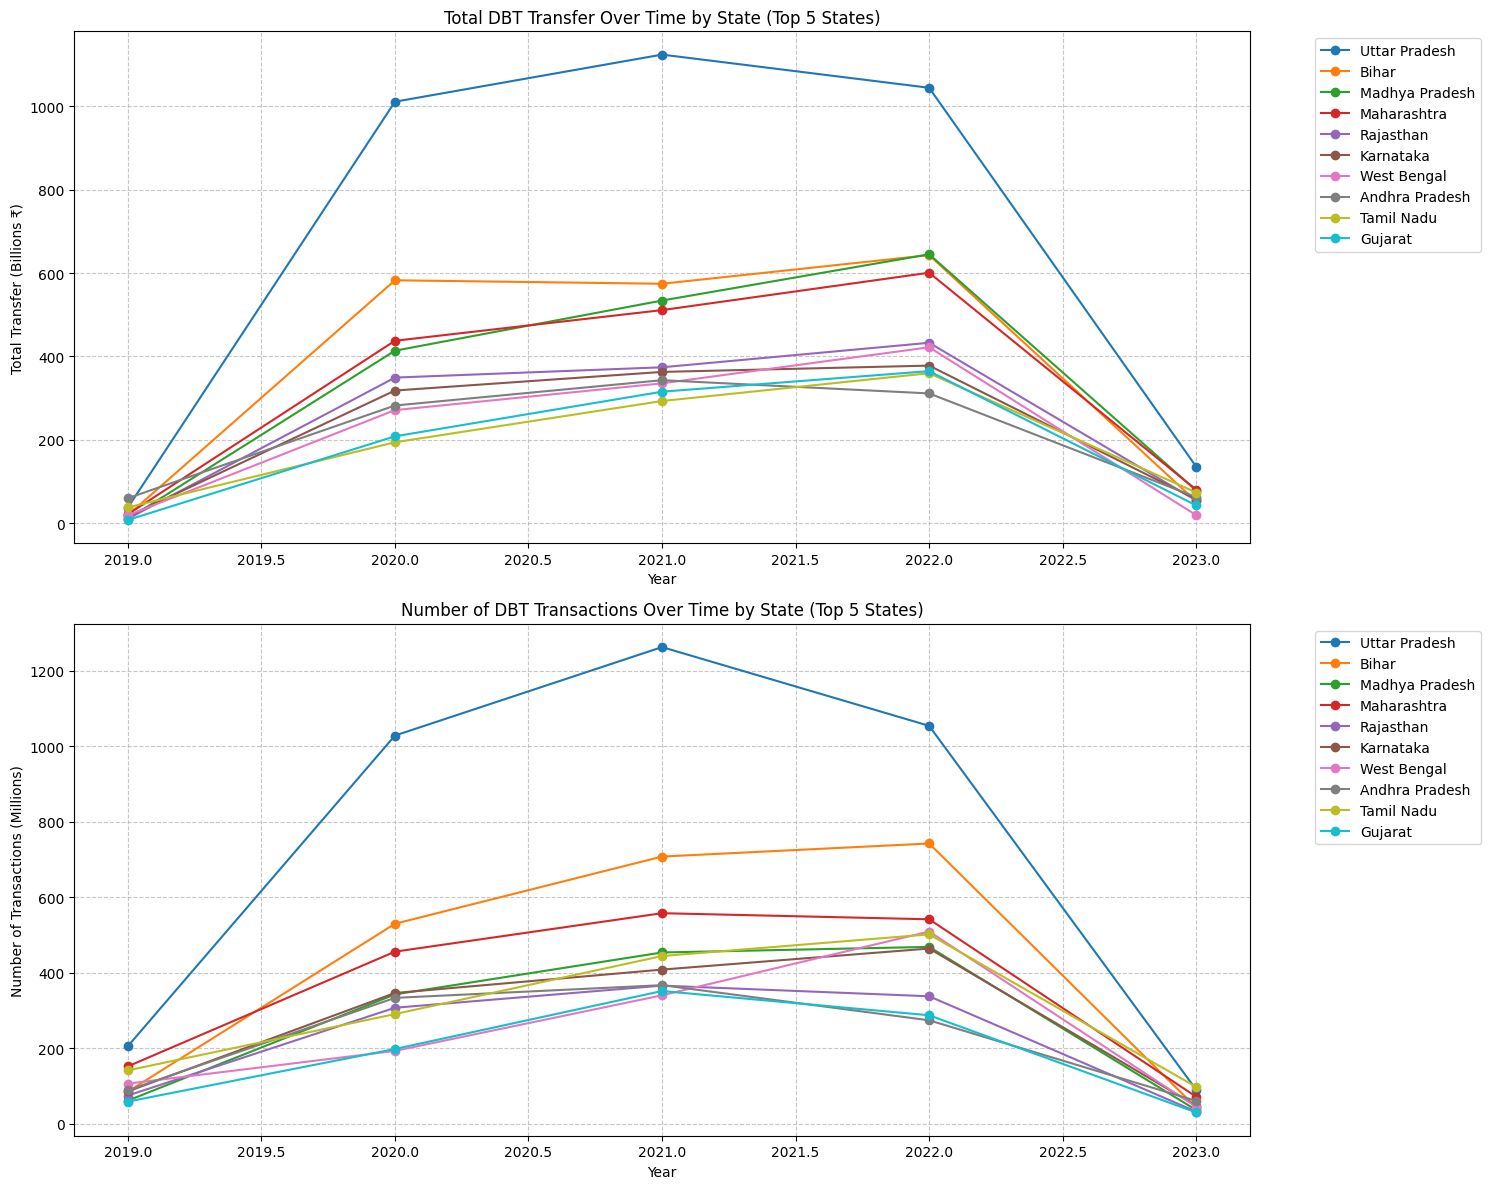


Time Series Analysis Insights for ML:
1. Temporal Patterns:

Uttar Pradesh:
  - Growth Rate: 259.23%
  - Avg. Annual Transactions: 727,714,104

Bihar:
  - Growth Rate: 168.50%
  - Avg. Annual Transactions: 421,210,817

Madhya Pradesh:
  - Growth Rate: 646.75%
  - Avg. Annual Transactions: 272,100,424

Maharashtra:
  - Growth Rate: 268.33%
  - Avg. Annual Transactions: 355,358,151

Rajasthan:
  - Growth Rate: 392.81%
  - Avg. Annual Transactions: 223,138,881

Karnataka:
  - Growth Rate: 245.40%
  - Avg. Annual Transactions: 270,062,202

West Bengal:
  - Growth Rate: 2.06%
  - Avg. Annual Transactions: 238,256,768

Andhra Pradesh:
  - Growth Rate: 4.29%
  - Avg. Annual Transactions: 224,357,067

Tamil Nadu:
  - Growth Rate: 93.68%
  - Avg. Annual Transactions: 294,671,913

Gujarat:
  - Growth Rate: 421.36%
  - Avg. Annual Transactions: 184,716,985


In [27]:
# 3.1 Time Series Analysis by State

# Calculate state-wise metrics per year
state_time_series = df.groupby(['state_name', 'start_year']).agg({
    'total_dbt_transfer': 'sum',
    'no_of_dbt_transactions': 'sum'
}).reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot total transfers over time for top 5 states
top_5_states = state_time_series.groupby('state_name')['total_dbt_transfer'].sum().nlargest(10).index

for state in top_5_states:
    state_data = state_time_series[state_time_series['state_name'] == state]
    ax1.plot(state_data['start_year'], state_data['total_dbt_transfer']/1e9, 
             marker='o', label=state)

ax1.set_title('Total DBT Transfer Over Time by State (Top 5 States)', fontsize=12)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Transfer (Billions ₹)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot number of transactions over time for the same states
for state in top_5_states:
    state_data = state_time_series[state_time_series['state_name'] == state]
    ax2.plot(state_data['start_year'], state_data['no_of_dbt_transactions']/1e6, 
             marker='o', label=state)

ax2.set_title('Number of DBT Transactions Over Time by State (Top 5 States)', fontsize=12)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Transactions (Millions)')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print ML-relevant insights
print("\nTime Series Analysis Insights for ML:")
print("1. Temporal Patterns:")
for state in top_5_states:
    state_data = state_time_series[state_time_series['state_name'] == state]
    growth_rate = ((state_data['total_dbt_transfer'].iloc[-1] / 
                    state_data['total_dbt_transfer'].iloc[0]) - 1) * 100
    print(f"\n{state}:")
    print(f"  - Growth Rate: {growth_rate:.2f}%")
    print(f"  - Avg. Annual Transactions: {state_data['no_of_dbt_transactions'].mean():,.0f}")

<Figure size 1200x1200 with 0 Axes>

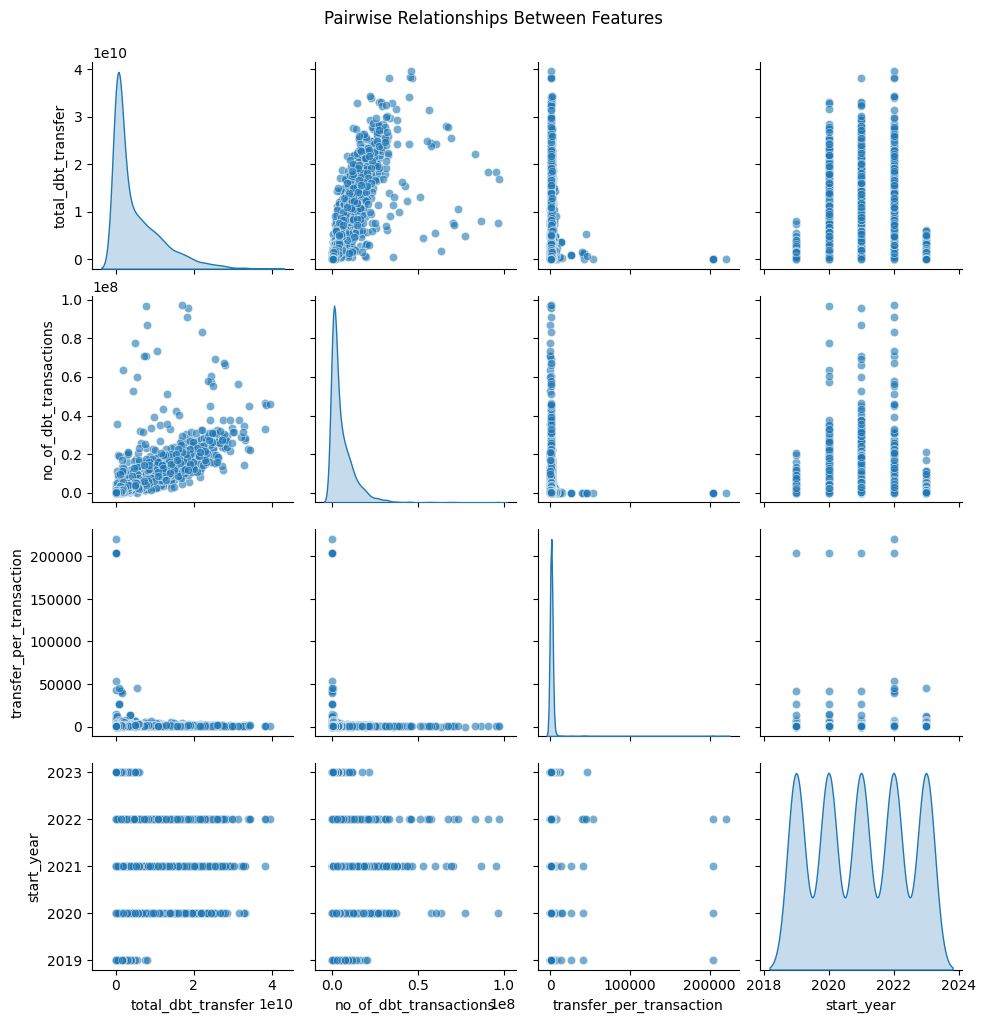

In [30]:
# 3.2 Pairplot Analysis

# Select relevant numerical features for pairplot
features_for_pairplot = ['total_dbt_transfer', 'no_of_dbt_transactions', 
                        'transfer_per_transaction', 'start_year']

# Create pairplot
plt.figure(figsize=(12, 12))
sns.pairplot(df[features_for_pairplot], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships Between Features', y=1.02, fontsize=12)
plt.show()

## 4. Geo-Spatial Analysis
Understanding geographical patterns and spatial distributions of DBT transfers across districts.

In [33]:
# 4.1 Create State-wise Total DBT Transfer Visualization
import plotly.express as px

# Calculate state-wise total transfers
state_metrics = df.groupby('state_name').agg({
    'total_dbt_transfer': 'sum',
    'no_of_dbt_transactions': 'sum'
}).reset_index()

# Convert transfer amounts to billions for better visualization
state_metrics['total_dbt_transfer_billions'] = state_metrics['total_dbt_transfer'] / 1e9

# Create choropleth map for Indian states
fig = px.choropleth(
    state_metrics,
    locations='state_name',
    locationmode='geojson-id',
    color='total_dbt_transfer_billions',
    scope="asia",
    center={"lat": 20.5937, "lon": 78.9629},
    hover_data={
        'total_dbt_transfer_billions': ':.2f',
        'no_of_dbt_transactions': ':,.0f'
    },
    color_continuous_scale='Viridis',
    labels={
        'total_dbt_transfer_billions': 'Total DBT Transfer (Billions ₹)',
        'no_of_dbt_transactions': 'Number of Transactions'
    },
    title='State-wise Total DBT Transfer Distribution in India'
)

# Update layout for better visualization
fig.update_geos(
    visible=False,
    resolution=50,
    showcountries=True,
    countrycolor="Black",
    showsubunits=True,
    subunitcolor="Black"
)

fig.update_layout(
    margin={"r":0,"t":30,"l":0,"b":0},
    title_x=0.5,
    geo=dict(
        scope='asia',
        projection_scale=4,
        center=dict(lat=20.5937, lon=78.9629),
        lonaxis_range=[68, 98],
        lataxis_range=[6, 38]
    )
)
fig.show()

# Print analytical insights
print("\nState-wise DBT Transfer Analysis:")
print("\n1. Distribution of Total DBT Transfers:")

# Analyze high transfer states
high_transfer_states = state_metrics.nlargest(5, 'total_dbt_transfer')
print("\nTop 5 States by Total Transfer Amount:")
for _, state in high_transfer_states.iterrows():
    print(f"- {state['state_name']}: ₹{state['total_dbt_transfer_billions']:.2f}B")

# Calculate statistics about state-wise transfers
mean_transfer = state_metrics['total_dbt_transfer_billions'].mean()
median_transfer = state_metrics['total_dbt_transfer_billions'].median()
print(f"\nAverage Transfer per State: ₹{mean_transfer:.2f}B")
print(f"Median Transfer per State: ₹{median_transfer:.2f}B")

# Calculate and display distribution metrics
total_transfer = state_metrics['total_dbt_transfer_billions'].sum()
print(f"\nTotal DBT Transfer across all states: ₹{total_transfer:.2f}B")

# Display share of top states
top_states_share = (high_transfer_states['total_dbt_transfer_billions'].sum() / total_transfer) * 100
print(f"\nShare of top 5 states: {top_states_share:.2f}% of total transfers")


State-wise DBT Transfer Analysis:

1. Distribution of Total DBT Transfers:

Top 5 States by Total Transfer Amount:
- Uttar Pradesh: ₹3351.54B
- Bihar: ₹1872.16B
- Madhya Pradesh: ₹1682.26B
- Maharashtra: ₹1652.02B
- Rajasthan: ₹1222.39B

Average Transfer per State: ₹554.31B
Median Transfer per State: ₹315.78B

Total DBT Transfer across all states: ₹19955.22B

Share of top 5 states: 49.01% of total transfers


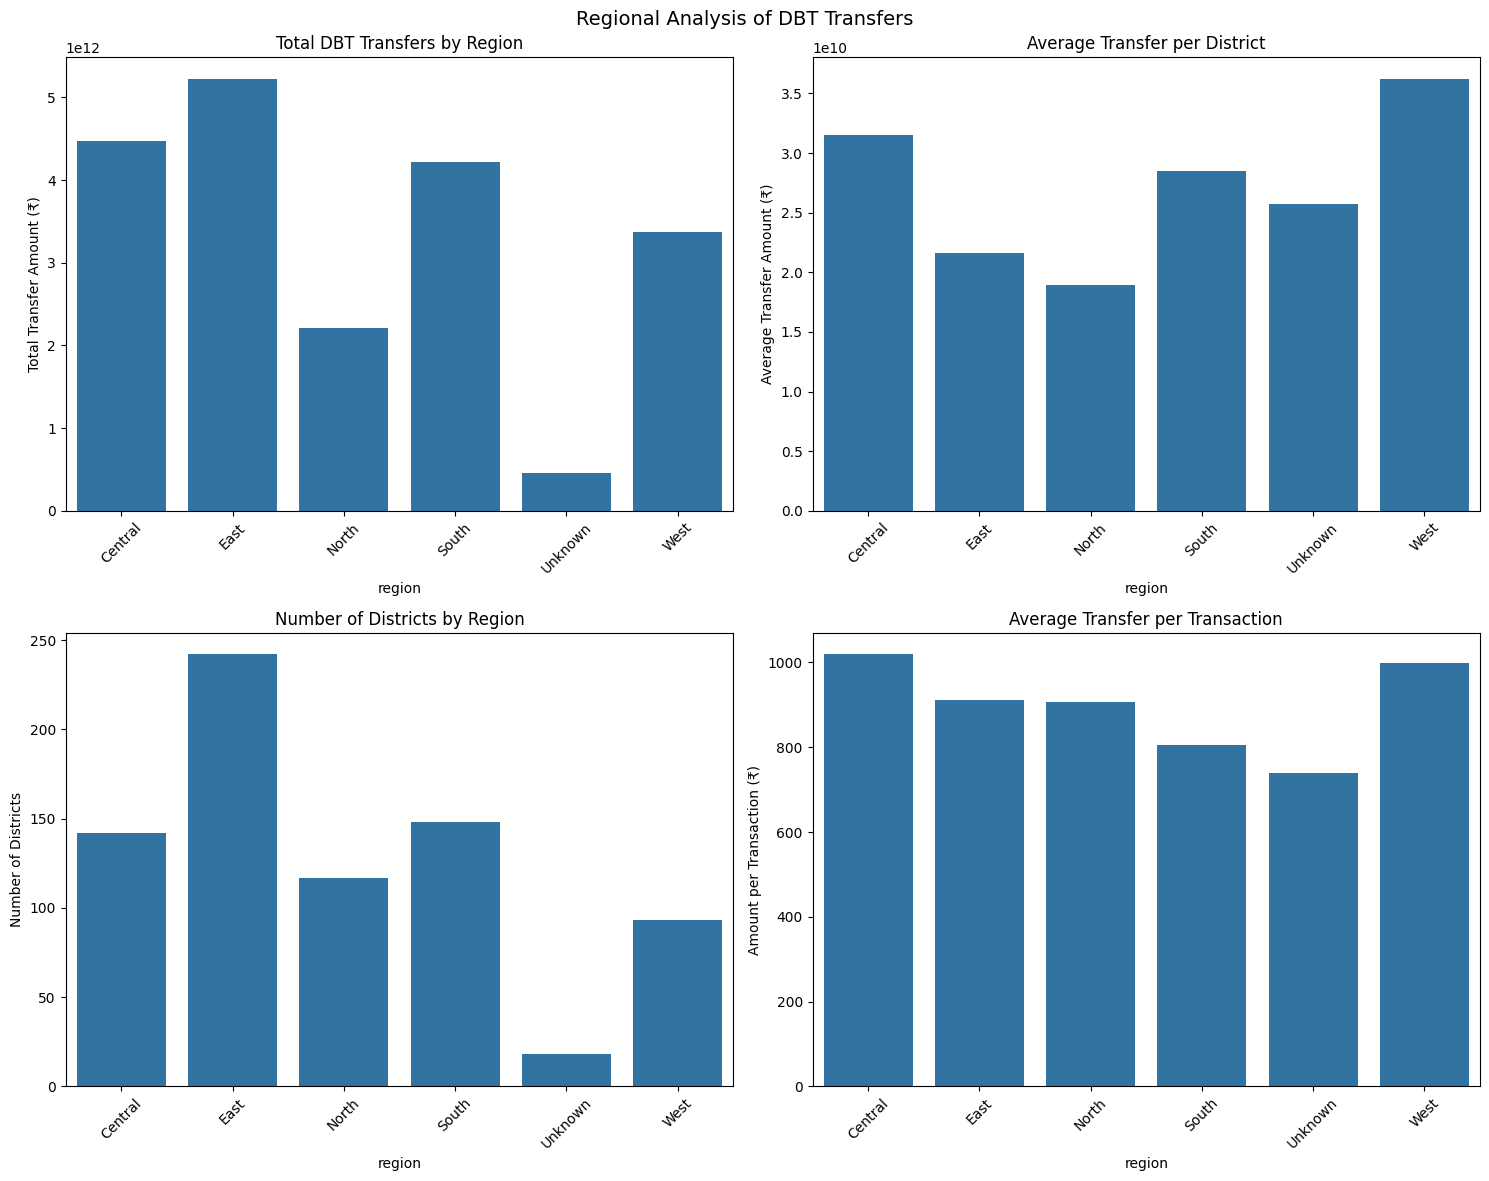


Regional Analysis Insights for ML:

1. Regional Patterns:

Central Region:
  - Number of Districts: 142
  - Total Transfers: ₹4,471,866,760,089.00
  - Avg per Transaction: ₹1,019.02

East Region:
  - Number of Districts: 242
  - Total Transfers: ₹5,222,796,119,062.00
  - Avg per Transaction: ₹911.48

North Region:
  - Number of Districts: 117
  - Total Transfers: ₹2,215,510,947,151.00
  - Avg per Transaction: ₹906.48

South Region:
  - Number of Districts: 148
  - Total Transfers: ₹4,214,375,674,493.00
  - Avg per Transaction: ₹806.14

Unknown Region:
  - Number of Districts: 18
  - Total Transfers: ₹462,472,867,071.00
  - Avg per Transaction: ₹739.22

West Region:
  - Number of Districts: 93
  - Total Transfers: ₹3,368,200,605,753.00
  - Avg per Transaction: ₹999.86

2. ML Feature Engineering Suggestions:
- Create regional dummy variables
- Include regional averages as reference features
- Consider regional seasonality patterns
- Add distance from regional centers
- Create regional r

In [ ]:
# 4.2 Regional Analysis

# Define regions based on latitude and longitude
def assign_region(row):
    lat, lon = row['latitude'], row['longitude']
    if pd.isna(lat) or pd.isna(lon):
        return 'Unknown'
    # Basic regional division of India
    if lat >= 28:
        return 'North'
    elif lat <= 18:
        return 'South'
    elif lon >= 83:
        return 'East'
    elif lon <= 77:
        return 'West'
    else:
        return 'Central'

# Add region information
district_metrics['region'] = district_metrics.apply(assign_region, axis=1)

# Regional summary
regional_summary = district_metrics.groupby('region').agg({
    'total_dbt_transfer': 'sum',
    'no_of_dbt_transactions': 'sum',
    'district_name': 'count'
}).rename(columns={'district_name': 'number_of_districts'})

regional_summary['avg_transfer_per_district'] = regional_summary['total_dbt_transfer'] / regional_summary['number_of_districts']
regional_summary['transfer_per_transaction'] = regional_summary['total_dbt_transfer'] / regional_summary['no_of_dbt_transactions']

# Create subplots for regional analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Regional Analysis of DBT Transfers', fontsize=14)

# 1. Total transfers by region
sns.barplot(data=regional_summary.reset_index(), 
           x='region', y='total_dbt_transfer', 
           ax=axes[0,0])
axes[0,0].set_title('Total DBT Transfers by Region')
axes[0,0].set_ylabel('Total Transfer Amount (₹)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Average transfer per district
sns.barplot(data=regional_summary.reset_index(), 
           x='region', y='avg_transfer_per_district', 
           ax=axes[0,1])
axes[0,1].set_title('Average Transfer per District')
axes[0,1].set_ylabel('Average Transfer Amount (₹)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Number of districts
sns.barplot(data=regional_summary.reset_index(), 
           x='region', y='number_of_districts', 
           ax=axes[1,0])
axes[1,0].set_title('Number of Districts by Region')
axes[1,0].set_ylabel('Number of Districts')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Transfer per transaction
sns.barplot(data=regional_summary.reset_index(), 
           x='region', y='transfer_per_transaction', 
           ax=axes[1,1])
axes[1,1].set_title('Average Transfer per Transaction')
axes[1,1].set_ylabel('Amount per Transaction (₹)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print regional insights
print("\nRegional Analysis Insights for ML:")
print("\n1. Regional Patterns:")
for region in regional_summary.index:
    print(f"\n{region} Region:")
    print(f"  - Number of Districts: {regional_summary.loc[region, 'number_of_districts']:,}")
    print(f"  - Total Transfers: ₹{regional_summary.loc[region, 'total_dbt_transfer']:,.2f}")
    print(f"  - Avg per Transaction: ₹{regional_summary.loc[region, 'transfer_per_transaction']:,.2f}")

print("\n2. ML Feature Engineering Suggestions:")
print("- Create regional dummy variables")
print("- Include regional averages as reference features")
print("- Consider regional seasonality patterns")
print("- Add distance from regional centers")
print("- Create regional ranking features")

In [ ]:
# 4.2 Time Series Choropleth Analysis

# Prepare data for time series analysis
time_district_metrics = df.groupby(['district_name', 'start_year']).agg({
    'total_dbt_transfer': 'sum',
    'no_of_dbt_transactions': 'sum'
}).reset_index()

# Calculate year-over-year growth
time_district_metrics['yoy_growth'] = time_district_metrics.groupby('district_name')['total_dbt_transfer'].pct_change() * 100

# Create animated choropleth map
fig = px.choropleth(time_district_metrics,
                    locations='district_name',  # You'll need to match this with actual district codes
                    locationmode='district_name',
                    color='total_dbt_transfer',
                    hover_name='district_name',
                    animation_frame='start_year',
                    title='District-wise DBT Transfer Evolution',
                    color_continuous_scale='Viridis')

fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

# Print temporal-spatial insights
print("\nTemporal-Spatial Analysis Insights for ML:")
print("\n1. Growth Patterns:")
high_growth_districts = time_district_metrics[time_district_metrics['yoy_growth'] > 50]['district_name'].unique()
print(f"High Growth Districts (>50% YoY): {len(high_growth_districts)}")

print("\n2. Temporal Stability:")
stability_metric = time_district_metrics.groupby('district_name')['total_dbt_transfer'].std() / \
                  time_district_metrics.groupby('district_name')['total_dbt_transfer'].mean()
stable_districts = stability_metric[stability_metric < 0.2].index
print(f"Stable Districts (CV < 0.2): {len(stable_districts)}")

print("\n3. ML Implications:")
print("- Consider creating temporal stability features")
print("- Include growth rate indicators")
print("- Add regional trend indicators")

ValueError: 
    Invalid value of type 'builtins.str' received for the 'locationmode' property of choropleth
        Received value: 'district_name'

    The 'locationmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['ISO-3', 'USA-states', 'country names', 'geojson-id']